In [1]:
# TO-DO
## To be implemented yet
# Day 1: Spend building the front-end for iOS, android & web
# Day 2: Spend building the deep learning CNN models, viz., YOLO to object detect license plates
# Day 3: Spend semantically(character) segment numberplates and integrate with front-end

In [19]:
!python './server.py'

 * Serving Flask app 'server'
 * Debug mode: on
 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat
 * Debugger is active!
 * Debugger PIN: 949-036-341
^C


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
import keras
import easyocr
import base64
# from keras import optimizers
# from keras import Sequential
# from keras.preprocessing.image import ImageDataGenerator
# from keras.layers import Dense, Flatten, MaxPooling2D, Dropout, Conv2D

In [6]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [7]:
# Making sure of the tensorflow compatibility with the keras API/framework
print("Tensorflow version: " + tf.__version__ + " Keras version: " + keras.__version__)

Tensorflow version: 2.15.0 Keras version: 2.15.0


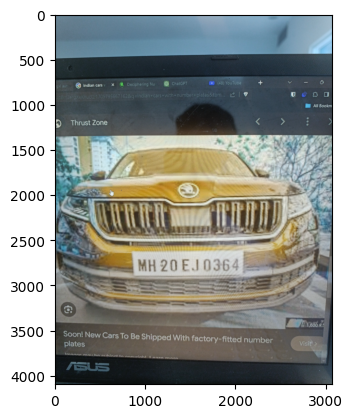

In [5]:
with open("./server/uploads/image_base64.txt", "r") as f:
    im_b64 = f.read()

im_bytes = base64.b64decode(im_b64)
im_arr = np.frombuffer(im_bytes, dtype=np.uint8)  # im_arr is one-dim Numpy array
img = cv2.imdecode(im_arr, flags=cv2.IMREAD_COLOR)
plt.imshow(img)

In [9]:
plate_cascade = cv2.CascadeClassifier('./filters/indian_license_plate.xml')
def detect_plate(img, text=''):
    plate = None  # Initialize plate with None
    plate_img = img.copy()
    roi = img.copy()
    plate_rect = plate_cascade.detectMultiScale(plate_img, scaleFactor=1.2, minNeighbors=7)
    for (x, y, w, h) in plate_rect:
        roi_ = roi[y:y+h, x:x+w, :]
        plate = roi[y:y+h, x:x+w, :]
        cv2.rectangle(plate_img, (x+2, y), (x+w-3, y+h-5), (51, 181, 155), 3)
    if text != '' and plate is not None:
        plate_img = cv2.putText(plate_img, text, (x-w//2, y-h//2), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.5, (51, 181, 155), 1, cv2.LINE_AA)

    return plate_img, plate

def display(img_, title=''):
    img = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)
    fig = plt.figure(figsize=(10,6))
    ax = plt.subplot(111)
    ax.imshow(img)
    plt.axis('off')
    plt.title(title)
    plt.show()

0: 480x640 1 licence, 731.5ms
Speed: 3.3ms preprocess, 731.5ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


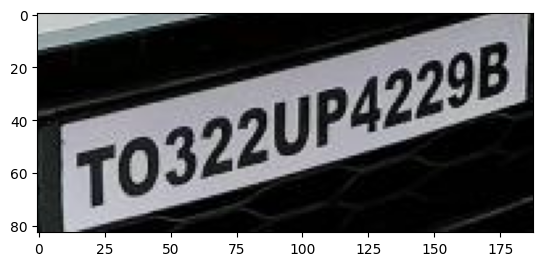

In [8]:
# from ultralytics import YOLO
# cmodel = YOLO('yolov5n.pt')
lpd = YOLO('best.pt')
# detections = cmodel(img)[0]
detections_ = []
vehicles = [2, 3, 5, 7]
# for detection in detections.boxes.data.tolist():
#     x1, y1, x2, y2, score, class_id = detection
#     if int(class_id) in vehicles:
#         detections_.append([x1, y1, x2, y2, score])

# detect license plates
license_plates = lpd(img)[0]
for license_plate in license_plates.boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = license_plate
    
    # # crop license plate
    license_plate_crop = img[int(y1):int(y2), int(x1): int(x2), :]
    plt.imshow(license_plate_crop)
    # # process license plate
    # license_plate_crop_gray = cv2.cvtColor(license_plate_crop, cv2.COLOR_BGR2GRAY)
    # _, license_plate_crop_thresh = cv2.threshold(license_plate_crop_gray, 64, 255, cv2.THRESH_BINARY_INV)

In [43]:
reader = easyocr.Reader(['en'], gpu=True)
result = reader.readtext(license_plate_crop)
print(result[0][1])

TO322UP4229B
